![imdb.jpg](attachment:imdb.jpg)

###  Analysis on IMDB useful libraries with sql

> ### Explanation

**SQLite :** - SQLite database is integrated with the application that accesses the database. The applications interact with the SQLite database read and write directly from the database files stored on disk.
         
- SQLite does NOT require a server to run.


- Refer at https://www.sqlite.org/index.html
    
    
    
> ![sqlite_image.jpg](attachment:sqlite_image.jpg)


**PANDAS :**
    - Pandas provide high performance, fast, easy to use data structures and data analysis tools for manipulating numeric data and time series. Pandas is built on the numpy library and written in languages like Python, Cython, and C. In pandas, we can import data from various file formats like JSON, SQL, Microsoft Excel, etc.
    
**NUMPY:**
       - Numpy is an Python library,It is used for scientific computing in python.It contains a collection of tools and techniques that can be used to solve on computers with mathematical model of problems.
       - High performance and multi-dimensional areay objects.
       - High level mathematical functions.
       - matrices
       
       
 ### Data Visualizations
 - Data Visualization is the graphic representation of data. It converts a huge dataset into small graphs, thus aids in data analysis and predictions
       
**MATPLOTLIB**
- It is a Python library used for plotting graphs with the help of other libraries like Numpy and Pandas. It is a powerful tool for visualizing data in Python. It is used for creating statical interferences and plotting 2D graphs of arrays

**SEABORN:**
- It is also a Python library used for plotting graphs with the help of Matplotlib, Pandas, and Numpy. It is built on the roof of Matplotlib and is considered as a superset of the Matplotlib library. It helps in visualizing univariate and bivariate data

In [3]:
# Import Pandas and NumPy

import numpy as np
import pandas as pd

# Import Libraries for plotting    # Visualizations
import matplotlib.pyplot as plt
import seaborn as sns



#pip install db-sqlite3
#SQLite in general is a server-less database that you can use within almost all programming languages including Python.
import sqlite3


# Supress Warnings



####   We import the sqlite3 module and then create a connection object which will connect us to the database and will let us execute the SQL statements.
> - sqlite3.connect(Database)
> - **cursor()** - we can use the cursor object to call the execute() method to execute any SQL queries.


#### STEPS
> To query data in an SQLite database from Python, you use these steps:

- First, establish a connection to the SQLite database by creating a Connection object.
- Next, create a Cursor object using the cursor method of the Connection object.
- Then, execute a  SELECT statement.
- After that, call the fetchall() method of the cursor object to fetch the data.
- Finally, loop the cursor and process each row individually.


In [180]:
mycon = sqlite3.connect('./movies.sqlite')
cur = mycon.cursor()

## QUESTIONS

#### **Question 1:** Can you get all data about movies?

In [12]:
cur.execute('SELECT * FROM movies')
#use the cursor object to call the execute() method to execute any SQL queries.
movies = cur.fetchall()

# #movies -> if u print movies , all the data shown in list manner, can't understanadble

# #Note - fetchall() --> fetch all rows for the current query, if no rows avaliable then,it returns an empty list.

movies = pd.DataFrame(movies, columns = ['id', 'original_title', 'budget', 'popularity', 'release_date', 'revenue', 'title', 'vote_average', 'vote_count', 'overview', 'tagline', 'uid', 'director_id'])
# #Creating a dataframe, A dataframe contains rows and columns , It is a Two-dimensional, size-mutable, potentially heterogeneous tabular data.



print('Shape of Movies data :',movies.shape)
print('\n\n\n')
movies.head(3)
# #Displays first 3 rows in the table


Shape of Movies data : (4773, 13)






,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764


In [8]:
import pandas as pd
movies_df = pd.read_sql('SELECT * FROM movies', mycon)
movies_df

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,48395,El Mariachi,220000,14,1992-09-04,2040920,El Mariachi,6.6,238,El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...",9367,5097
4769,48396,Newlyweds,9000,0,2011-12-26,0,Newlyweds,5.9,5,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,72766,6485
4770,48397,"Signed, Sealed, Delivered",0,1,2013-10-13,0,"Signed, Sealed, Delivered",7.0,6,"""Signed, Sealed, Delivered"" introduces a dedic...",None,231617,7108
4771,48398,Shanghai Calling,0,0,2012-05-03,0,Shanghai Calling,5.7,7,When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,126186,7109


In [9]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4773 non-null   int64  
 1   original_title  4773 non-null   object 
 2   budget          4773 non-null   int64  
 3   popularity      4773 non-null   int64  
 4   release_date    4773 non-null   object 
 5   revenue         4773 non-null   int64  
 6   title           4773 non-null   object 
 7   vote_average    4773 non-null   float64
 8   vote_count      4773 non-null   int64  
 9   overview        4770 non-null   object 
 10  tagline         3951 non-null   object 
 11  uid             4773 non-null   int64  
 12  director_id     4773 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 484.9+ KB


In [ ]:
movies.isnull().sum()

id                  0
original_title      0
budget              0
popularity          0
release_date        0
revenue             0
title               0
vote_average        0
vote_count          0
overview            3
tagline           822
uid                 0
director_id         0
dtype: int64


#### **Question 2:** How do you get all data about directors?

In [ ]:
query = 'SELECT * FROM directors'
directors_df = pd.read_sql(query, mycon)
directors_df

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing
...,...,...,...,...,...
2344,Shane Carruth,7106,2,76624,Directing
2345,Neill Dela Llana,7107,0,1174437,Directing
2346,Scott Smith,7108,0,1219158,Directing
2347,Daniel Hsia,7109,2,208138,Directing


In [ ]:
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        2349 non-null   object
 1   id          2349 non-null   int64 
 2   gender      2349 non-null   int64 
 3   uid         2349 non-null   int64 
 4   department  2349 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.9+ KB


#### **Question 3:** Check how many movies are present in iMDB.

In [13]:
cur.execute('SELECT COUNT (id) from movies;')
#use the cursor object to call the execute() method to execute any SQL queries.
count = cur.fetchall()
print("the number of movies is present in IMDB is  :",count[0])
#Note - fetchall() --> fetch all rows for the current query, if no rows avaliable then,it returns an empty list.




the number of movies is present in IMDB is  : (4773,)


In [ ]:
##ASSIGNMENT

# dataframes to be used for pandas - movies_df, directors_df
# for sql table names are movies and directors

#### **Question 4:** Find these 3 directors: James Cameron ; Luc Besson ; John Woo


In [16]:
name = 'select * from directors where NAME ="James Cameron" OR NAME =  "Luc Besson" OR NAME = "John Woo" AND department = "Directing"'
cur.execute(name)
cur.fetchall()

[('James Cameron', 4762, 2, 2710, 'Directing'),
 ('John Woo', 4893, 2, 11401, 'Directing'),
 ('Luc Besson', 4949, 2, 59, 'Directing')]

#### **Question 5:** Find all directors with name starting with Steven.


In [21]:
name = "SELECT * from directors  where name like 'Steven%'"
cur.execute(name)
#cur.fetchall()

df = pd.DataFrame(cur.fetchall(),columns =['Name','id','gender','uid','department'])
df

,Name,id,gender,uid,department
0,Steven Spielberg,4799,2,488,Directing
1,Steven Soderbergh,4909,2,1884,Directing
2,Steven Brill,5013,2,32593,Directing
3,Steven Zaillian,5117,2,2260,Directing
4,Steven Quale,5216,2,93214,Directing
5,Steven Seagal,5221,2,23880,Directing
6,Steven E. de Souza,5390,2,1726,Directing
7,Steven Shainberg,5803,2,67795,Directing
8,Steven R. Monroe,6713,2,88039,Directing


#### **Question 6:** Count female directors.


In [38]:
name = 'SELECT count(gender) from directors where gender = 1'
cur.execute(name)
cur.fetchall()
#df= pd.DataFrame(cur.fetchall(),columns = ['Name','id','gender','uid','department'])
#df

[(150,)]

#### **Question 7:**  Find the name of the 10th first women directors?


In [44]:
name = 'SELECT * from directors where gender = 0 order by id asc limit 1 offset 10'
cur.execute(name)
cur.fetchall()

[('Jonathan Liebesman', 4849, 0, 66739, 'Directing')]

#### **Question 8:** What are the 3 most popular movies?


In [50]:
name = 'SELECT original_title FROM movies ORDER by popularity desc limit 3'
cur.execute(name)
#cur.fetchall()

df= pd.read_sql(name,mycon)
df

,original_title
0,Minions
1,Interstellar
2,Deadpool


#### **Question 9:**  What are the 3 most bankable movies?
 

In [51]:
name = 'SELECT original_title FROM movies ORDER by budget desc limit 3'
cur.execute(name)
#cur.fetchall()

df= pd.read_sql(name,mycon)
df

,original_title
0,Pirates of the Caribbean: On Stranger Tides
1,Pirates of the Caribbean: At World's End
2,Avengers: Age of Ultron


#### **Question 10:**  What is the most awarded average vote since the January 1st, 2000?


In [53]:
name ='SELECT original_title FROM movies WHERE release_date > "2000-01-01" ORDER by vote_average DESC LIMIT 1'
cur.execute(name)
#cur.fetchall()

df= pd.read_sql(name,mycon)
df

,original_title
0,Sardaarji


### JOINS
> Inner join
> left join
> right join
> full outer join
- #### Explanation

> Inner join : - Wherever the data matching between the two tables only thouse records will displayed . (Only matched in both tables)

> Left join : - All the data which is present on the left side will displayed, irrespective it having matching entry will displays or if it does not match entry on another table

> Right join : - ( vice-versa ) as Left join From right table all records will displayas, irrespective
But in left table who are matching are be displayed

> full outer join : -  It is a combination of  Inner join , Left join, Right join.
> **Full outer join** shows all matching records,
- It will displays all matching records as well as It will display non matching records  On left table and right table.
- It will show every thing on what tables contains
                        
                     
        
**NOTE** 
- >  Left join display all records in left table
- >  Right join display all records in right table
- >  Inner join display only matching records from tables



#### **Question 11:**  Which movie(s) were directed by Brenda Chapman?


In [56]:
#using sql
name = 'SELECT original_title FROM movies JOIN directors ON directors.id = movies.director_id WHERE directors.name = "Brenda Chapman"'
cur.execute(name)
#cur.fetchall()

df= pd.read_sql(name,mycon)
df

,original_title
0,Brave


#### **Question 12:** Whose director made the most movies?



In [64]:
name = 'SELECT name FROM directors JOIN movies ON directors.id = movies.director_id GROUP BY director_id ORDER BY count(name) DESC limit 1'
cur.execute(name)
#cur.fetchall()

df= pd.read_sql(name,mycon)
df

,name
0,Steven Spielberg


#### **Question 13:** Whose director is the most bankable?


In [63]:
name = 'SELECT name FROM directors JOIN movies ON directors.id = movies.director_id GROUP BY director_id ORDER BY sum(budget) DESC limit 1'
cur.execute(name)
#cur.fetchall()

df= pd.read_sql(name,mycon)
df

,name
0,Steven Spielberg


# Analysis on IMDB DATA SET

### Budget Analysis

**Question** - List out Top 10 highest budget made movies 

In [65]:
name = "SELECT original_title FROM movies ORDER by budget desc limit 10"
cur.execute(name)

#cur.fetchall()

df= pd.read_sql(name,mycon)
df

,original_title
0,Pirates of the Caribbean: On Stranger Tides
1,Pirates of the Caribbean: At World's End
2,Avengers: Age of Ultron
3,Superman Returns
4,John Carter
5,Tangled
6,Spider-Man 3
7,The Lone Ranger
8,The Dark Knight Rises
9,Harry Potter and the Half-Blood Prince






> ## Note :

The mostExpensive Table Contains List Of Movies With Highest Production Costs. 

For Your Information, Pirates of the Caribbean: On Stranger Tides, Directed By Rob Marshall, Is The Most Production Costs, It's USD 380,000,000.

### Popularity Analysis

**Question**- List out Top 10 popularity on movies

In [66]:
name = "SELECT original_title FROM movies ORDER by popularity desc limit 10"
cur.execute(name)

#cur.fetchall()

df= pd.read_sql(name,mycon)
df

,original_title
0,Minions
1,Interstellar
2,Deadpool
3,Guardians of the Galaxy
4,Mad Max: Fury Road
5,Jurassic World
6,Pirates of the Caribbean: The Curse of the Bla...
7,Dawn of the Planet of the Apes
8,The Hunger Games: Mockingjay - Part 1
9,Big Hero 6




> ## Note:

mostPopular Table Shows 10 Movies With The Highest Ranking By Popularity. 

Currently, Minions Directed By Kyle Balda Got The First Place With Score 875, Beating Interstellar As The Closest Competitor, Deadpool And The Other Competitors.

### Revenu Analysis

**Question** - What are the top 10 Revenue  movies  

In [67]:
name = "SELECT original_title FROM movies ORDER by revenue desc limit 10"
cur.execute(name)

#cur.fetchall()

df= pd.read_sql(name,mycon)
df

,original_title
0,Avatar
1,Titanic
2,The Avengers
3,Jurassic World
4,Furious 7
5,Avengers: Age of Ultron
6,Frozen
7,Iron Man 3
8,Minions
9,Captain America: Civil War




> ## Note :

The mostProfit Table Shows The 10 Movies Got The Highest Gross Profit When Compared To The Other Movies.

It Turns Out That Avatar Directed By James Cameron Got A Gross Profit USD 2,787,965,087. It's Make Avatar In First Place, Followed By Titanic, The Avengers, Jurassic World, And Others.

From The Table, It Can Be Seen That James Cameron Make Two Movies To Fill The First And Second Place On The Rankings.



**Question** - Display most popular movies with vote_average

In [77]:
name = "SELECT original_title FROM movies ORDER by vote_average desc limit 10"
cur.execute(name)

#cur.fetchall()

df= pd.read_sql(name,mycon)
df

,original_title
0,Stiff Upper Lips
1,"Dancer, Texas Pop. 81"
2,Sardaarji
3,One Man's Hero
4,The Shawshank Redemption
5,There Goes My Baby
6,The Prisoner of Zenda
7,The Godfather
8,Fight Club
9,Schindler's List




> ## Note : 

From the mostProfit Table, It Can Be Seen That The Movies In The First And Second Rank Is A Movies Directed By James Cameron.

In The Table moviesByJamesCameron Shows All Movies Directed By James Cameron.

### Voting Analysis

**Question** - List out Particular movie for Voting average and votecount 

In [107]:
nam = "SELECT movies.original_title, movies.vote_average, movies.vote_count, directors.name FROM movies LEFT JOIN directors ON directors.id = movies.director_id GROUP by director_id order by vote_average desc "
cur.execute(nam)

#cur.fetchall()

df= pd.read_sql(nam,mycon)
df

,original_title,vote_average,vote_count,name
0,Stiff Upper Lips,10.0,1,Gary Sinyor
1,Sardaarji,9.5,2,Rohit Jugraj
2,One Man's Hero,9.3,2,Lance Hool
3,There Goes My Baby,8.5,2,Floyd Mutrux
4,The Prisoner of Zenda,8.4,11,John Cromwell
...,...,...,...,...
2344,Four Single Fathers,0.0,0,Paolo Monico
2345,The Deported,0.0,0,Lance Kawas
2346,Time to Choose,0.0,0,Charles Ferguson
2347,Should've Been Romeo,0.0,0,Marcia Bennett


 

> ## Note :

BestVote Table Contains The Best Movies By Vote. Stiff Upper Lips, Directed By Gary Sinyor And Dancer, Texas Pop. 81 Directed by the MacCanlies Was Successfully Becomes the Best Movies By Vote With Perfect Score, 10.

However, There Are Anomalies. It Turned Out That The Two Movies Were Only Vote By One Person. So, Likely to Affect The Assessment Results..

### CORRELATION
- **Correlation** is also a statistical technique that determines how the change of one variable related to another variable affects the relationship.
-  it defines the degree of relation between two variables. There exist three types of correlations - positive and negative, and zero correlations. 



> The main intention of Seaborn heatmap is to visualize the correlation matrix of data for feature selection to solve business problems
> Python data visualization seaborn library has a powerful function that is called sns.heatmap(). 
> annot — **annot** when set to True, the correlation values become visible on the colored cells
> linewidth- **linewidth** Width of the lines that will divide each cell.


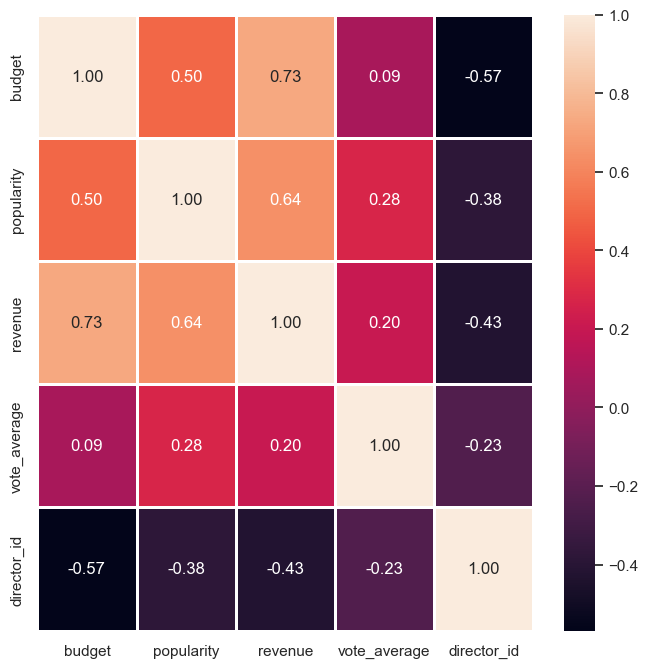

In [73]:
# plot a heatmap of correlation
#corr() is used to create the correlation matrix.
#You'll have to make sure that all the elements in the matrix are of numeric type. 
#If they are not of the numeric type you'll have to add or concat them explicitly.

sns.set(rc = {'figure.figsize': (8, 8)})
sns.heatmap(movies[['budget', 'popularity', 'revenue', 'vote_average', 'director_id']].corr(), 
            annot = True, fmt = '.2f', linewidth = 1);



> ## Note On correlation :

The Heat Map Graph Shows The Effect Between One Variable To The Other Variables. 

In The Graph, It Is Clear That budget Has The Greatest Impact on revenue with 0.73. 

Meanwhile, popularity Is Quite Impact On revenue, And director_id Which Means director_name Also Has A Correlation With revenue, Even Though It Is Small. 

However, vote_average Has A Very Small Correlation With revenue.

### Directors

**Question**- List out the  director names with number of movies and revenue

In [166]:
name = "SELECT directors.id,name,count(movies.title) as movie_count, sum(revenue) AS total_revenue from directors LEFT JOIN movies ON directors.id = movies.director_id GROUP by name "
cur.execute(name)
#cur.fetchall()
df = pd.read_sql(name,mycon)
df

,id,name,movie_count,total_revenue
0,6671,Aaron Hann,1,0
1,6252,Aaron Schneider,1,0
2,5974,Abel Ferrara,1,1227324
3,6247,Adam Brooks,1,55447968
4,6742,Adam Carolla,1,0
...,...,...,...,...
2344,5043,Àlex Pastor,1,5802422
2345,6127,Álex de la Iglesia,1,0
2346,6338,Émile Gaudreault,1,3031801
2347,6603,Éric Tessier,1,0




> ## Note :

The mostProfitableDirector Table Shows The Directors With The Highest Gross Profit. 

Currently, Steven Spielberg Is The Director With The Most Gross Profit, with USD 9,147,393,164 from his 27 movies. 

Then, Peter Jackson With USD 6,498,642,820, James Cameron With USD 5,883,569,439, And The Other Directors.

**Question** - Display all the number of movies for particular director and revenue .

In [176]:
name = "SELECT name, sum(revenue) AS total_revenue, count(movies.title) as movie_count from directors LEFT JOIN movies ON directors.id = movies.director_id GROUP by title"
cur.execute(name)
#cur.fetchall()
df = pd.read_sql(name,mycon)
df

,name,total_revenue,movie_count
0,Tara Subkoff,0,1
1,Marc Webb,60722734,1
2,Dan Trachtenberg,108286421,1
3,Timothy Hines,0,1
4,Gil Junger,53478166,1
...,...,...,...
4765,Jaume Balagueró,18469680,1
4766,David Cronenberg,2856712,1
4767,Rob Cohen,277448382,1
4768,Lee Tamahori,71073932,1




> ### Note :

The mostProductiveDirector Table Contains The Name Of The Director And The Number Of Movies It Has Directed By Him. 

Steven Spielberg Is The Most Productive Director With 27 Movies Titles He Has Directed. Meanwhile, Woody Allen Has Only 21 Movies Titles. 

Then, Martin Scorsese And Clint Eastwood With 20 Movies Titles.


**Question**- By doing Director analysis We know Steven Spielberg is the highest revenue, so list the Steven Spielberg movies info

In [181]:
name = "SELECT * from movies Join directors on directors.id = movies.director_id where name = 'Steven Spielberg'"
cur.execute(name)
#cur.fetchall()
df = pd.read_sql(name,mycon)
df

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id,name,id,gender,uid,department
0,43650,Indiana Jones and the Kingdom of the Crystal S...,185000000,75,2008-05-21,786636033,Indiana Jones and the Kingdom of the Crystal S...,5.7,2495,"Set during the Cold War, the Soviets – led by ...",The adventure continues . . .,217,4799,Steven Spielberg,4799,2,488,Directing
1,43772,The BFG,140000000,44,2016-06-01,183345589,The BFG,6.0,1000,The BFG is no ordinary bone-crunching giant. H...,The world is more giant than you can imagine.,267935,4799,Steven Spielberg,4799,2,488,Directing
2,43782,War of the Worlds,132000000,48,2005-06-28,591739379,War of the Worlds,6.2,2322,Ray Ferrier is a divorced dockworker and less-...,They're already here.,74,4799,Steven Spielberg,4799,2,488,Directing
3,43787,The Adventures of Tintin,130000000,89,2011-10-25,371940071,The Adventures of Tintin,6.7,2061,"Intrepid young reporter, Tintin and his loyal ...","This year, discover how far adventure will tak...",17578,4799,Steven Spielberg,4799,2,488,Directing
4,43872,Minority Report,102000000,65,2002-06-20,358372926,Minority Report,7.1,2608,John Anderton is a top 'Precrime' cop in the l...,The system is perfect until it comes after you.,180,4799,Steven Spielberg,4799,2,488,Directing
5,43960,A.I. Artificial Intelligence,100000000,34,2001-06-29,235926552,A.I. Artificial Intelligence,6.8,1974,"A robotic boy, the first programmed to love, D...",David is 11 years old. He weighs 60 pounds. He...,644,4799,Steven Spielberg,4799,2,488,Directing
6,44105,The Lost World: Jurassic Park,73000000,2,1997-05-23,229074524,The Lost World: Jurassic Park,6.2,2487,Four years after Jurassic Park's genetically b...,Something has survived.,330,4799,Steven Spielberg,4799,2,488,Directing
7,44118,The Terminal,60000000,57,2004-06-17,219417255,The Terminal,7.0,1910,Viktor Navorski is a man without a country; hi...,Life is waiting.,594,4799,Steven Spielberg,4799,2,488,Directing
8,44125,Munich,70000000,29,2005-12-22,130358911,Munich,6.9,696,"During the 1972 Olympic Games in Munich, eleve...",The world was watching in 1972 as 11 Israeli a...,612,4799,Steven Spielberg,4799,2,488,Directing
9,44169,Hook,70000000,33,1991-12-11,300854823,Hook,6.6,1532,The boy who wasn't supposed to grow up—Peter P...,What if Peter Pan grew up?,879,4799,Steven Spielberg,4799,2,488,Directing




> ## Note : 

From Two Tables Above, mostProfitableDirector And mostProductiveDirector, It Can Be Seen That Steven Spielberg Is Always In The First Place. 

It Can Be Understood That Steven Spielberg Has Produced Many And Incredible Movies That Are Shows In The Table MoviesByStevenSpielberg Above.

